## Gather

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import tweepy
import re
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
% matplotlib inline
sns.set_style('darkgrid')

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_predictions_url)

In [4]:
file_name = 'image_predictions.tsv'
if not os.path.isfile(file_name):
    with open('image_predictions.tsv', mode='wb') as file:
        file.write(response.content)

In [5]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
df_list = []
with open('tweet-json.txt', mode='r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})

tweets_data = pd.DataFrame(df_list)

## Assess

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
# See if there are any denominators with values that doesn'y equal 10
twitter_archive[twitter_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [9]:
# print the tweets related to denominators not equal to 10, see if= that was intentional or an error

with pd.option_context("display.max_colwidth", -1):
    print(twitter_archive[twitter_archive.rating_denominator != 10].text)

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…                             
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                        

In [10]:
# Make sure that 342 is a reply tweet

twitter_archive.loc[342]

tweet_id                                                     832088576586297345
in_reply_to_status_id                                               8.32088e+17
in_reply_to_user_id                                                 3.05821e+07
timestamp                                             2017-02-16 04:45:50 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                                   @docmisterio account started on 11/15/15
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             11
rating_denominator                                                           15
name                                    

In [11]:
# See what the tweets with rating numerator more than 15 or less than 6 look like, are they anomalies, are some used intentionally?

twitter_archive[(twitter_archive.rating_numerator > 15) | (twitter_archive.rating_numerator < 6)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [12]:
# Print their text to investigate it further
with pd.option_context("display.max_colwidth", -1):
    print(twitter_archive[(twitter_archive.rating_numerator > 15) | (twitter_archive.rating_numerator < 6)].text)

45      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                                 
55      @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                                              
188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                                                   
189     @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10                                    
290     @markhoppus 182/10                                                                                                                                                       
313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho    

In [13]:
# what are the datatypes of columns in twitter_archive? are there NaN values where they shouldn't be?
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# See how many reply tweets are their and how they look like in our dataset
twitter_archive[twitter_archive.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [15]:
twitter_archive.loc[565].text

'Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze'

In [16]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# Are there any tweets with 0 rating? 
twitter_archive[twitter_archive.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [18]:
# Why was that? investigate the text and the tweets themselves.

with pd.option_context("display.max_colwidth", -1):
    print(twitter_archive[twitter_archive.rating_numerator == 0].text)

315     When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag      
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object


In [19]:
# any duplicated rows in the twitter_archive?
sum(twitter_archive.duplicated())

0

In [20]:
# any duplicated tweets?
sum(twitter_archive.tweet_id.duplicated())

0

In [21]:
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [22]:
# What are the names used in the name column, are they all valid?

twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Lola         10
Penny        10
Tucker       10
Winston       9
Bo            9
Sadie         8
the           8
Toby          7
Buddy         7
Bailey        7
an            7
Daisy         7
Jax           6
Oscar         6
Jack          6
Koda          6
Milo          6
Scout         6
Rusty         6
Dave          6
Stanley       6
Leo           6
Bella         6
very          5
           ... 
Storkson      1
Griswold      1
Bronte        1
Vinscent      1
Winifred      1
Arlen         1
Tilly         1
Nugget        1
Barclay       1
Carper        1
Jaycob        1
Reagan        1
Stark         1
Pippin        1
Danny         1
Mollie        1
Cedrick       1
Al            1
Clarq         1
Huxley        1
Blakely       1
Lance         1
Kingsley      1
Chloe         1
Ricky         1
Milky         1
Lucia         1
Travis        1
Fiji          1
Obie          1
Name: name, Length: 957,

In [23]:
# See how many of each dog stage there are
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [24]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [25]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [26]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [27]:
# See if all lowercase names are invalid names
twitter_archive[twitter_archive.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
mad              2
not              2
actually         2
getting          2
my               1
this             1
light            1
infuriating      1
old              1
life             1
unacceptable     1
his              1
all              1
officially       1
such             1
incredibly       1
space            1
by               1
Name: name, dtype: int64

In [28]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [29]:
# What are the datatypes of image_predictions columns? any NaN values?
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
# See statistics about numeric columns? are there any anomalies?
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
# any duplicates?
sum(image_predictions.duplicated())

0

In [32]:
# duplicate tweets?
sum(image_predictions.tweet_id.duplicated())

0

In [33]:
tweets_data

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


In [34]:
# see the datatypes and if there is ay NaN values
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [35]:
tweets_data.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [36]:
# any duplicate tweets?
sum(tweets_data.tweet_id.duplicated())

0

In [37]:
# what are the duplicate column between the datasets? should be only tweet_id
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(tweets_data))
all_columns[all_columns.duplicated()]

17    tweet_id
31    tweet_id
dtype: object

### Quality

#### `twitter_archive` table
- The table contains some retweetes (not original ratings) which are not valid according to the schema we want for this table. They can identified by the `retweeted_status_id` column. (after removing retweets, we won't need the `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns).


- Some tweets are replies. Those can be identified by the `in_reply_to_status_id` or `in_reply_to_user_id`. (we won't need those columns after removing all reply tweets, they will only contain NaN)


- Not all tweets contain images. those that don't have images won't correspond to an image prediction in `image_predictions` table. We can also use `expanded_urls` column to do this (NaN value for `expanded_urls` means the tweet doesn't contain an image). After that we won't need the `expanded_urls` column.


- Tweets with tweet_id `835246439529840640`, `832088576586297345`, `810984652412424192`, `682808988178739200`, `835152434251116546`, and `686035780142297088` are not actual ratings.


- `doggo`, `floofer`, `pupper`, and `puppo` columns contain 'None' instead of Nan.



- Erroneous datatypes, `timestamp` is a 'string' while it should be a 'datetime' datatype.


- `tweet_id` is better represented as 'str' object.


- The `name` column sometimes contains invalid names, all of them start with lowercase characters except for 'None'. This is wrong, should be NaN. Also should be NaN instead of 'None'. (finding missing names is almost impossible to fix as the name can be any noun the owner used and can be included in a sentence in many different ways)


- `rating_denominator` column sometimes does not equal 10. The values are sometimes either multiples of 10 or were misread from the text.


- `rating_numerator` contains some strange values. Sometimes multiples of 10 when the `rating_denominator` is a multiple of 10, and sometimes other values. (should be divided by 10 and converted to float datatype)


#### `image_predictions` table

- It may contain predictions for retweets or replies, should remove those using the clean `twitter_archive` table.

- Column names are not describtive enough. should be changed for better understanding.

- `tweet_id` column should have datatype 'str' object instead of 'int'.

#### `tweets_data` table
- `tweet_id` datatype is int instead of 'str' object. (will not need to address this after merging with `twitter_archive`)

### Tidiness
- The `doggo`, `floofer`, `pupper`, and `puppo` columns should be change to one column `dog_type` with datatype.


- `twitter_archive` and `tweets_data` tables should be joined together on the `tweet_id`.


- The columns of `image_predictions` are observations and not variables (except for tweet_id, jpg_url, and img_num)

## Clean

In [38]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_data_clean = tweets_data.copy()

### Missing & Invalid data

#### `twitter_archive`: The table contains some retweetes (not original ratings) which are not valid according to the schema we want for this table. They can be identified by the 'retweeted_status_id' column. (after removing retweets, we won't need the retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns).

##### Define
Remove the rows where `retweeted_status_id` is not null. After that drop `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns

##### Code

In [39]:
#Remove retweets from twitter_archive_clean
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna()]

#Drop the 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' columns
twitter_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

##### Test

In [40]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### `twitter_archive`: Some tweets are replies. Those can be identified by the `in_reply_to_status_id` or `in_reply_to_user_id`. (we won't need those columns after removing all reply tweets, they will only contain NaN)

##### Define
Remove the rows where `in_reply_to_status_id` is not null. After that drop `in_reply_to_status_id`, `in_reply_to_user_id` columns.

##### Code

In [41]:
#Remove replies from twitter_archive_clean
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isna()]

#Drop the 'in_reply_to_status_id', 'in_reply_to_user_id' columns
twitter_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


##### Test

In [42]:
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### `twitter_archive`: Not all tweets contain images. those that don't have images won't correspond to an image prediction in image_predictions table. We can also use expanded_urls column to do this (NaN value for expanded_urls means the tweet doesn't contain an image). After that we won't need the expanded_urls column.

##### Define
Remove tweets that don't have images from the `twitter_archive_clean` table. 

##### Code

In [43]:
#Get a list of all tweets that are in image_predictions table
tweets_in_prediction = list(image_predictions_clean.tweet_id)

#Remove tweets that don't have images
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]

#Remove tweets that are not in image_predictions table
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id.isin(tweets_in_prediction)]

#Drop the 'expanded_urls' columns since we don't need it any more
twitter_archive_clean.drop(columns = 'expanded_urls', inplace = True)

##### Test

In [44]:
twitter_archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None


#### `twitter_archive`: Tweets with `tweet_id` 835246439529840640, 832088576586297345, 810984652412424192, 682808988178739200, 835152434251116546, and 686035780142297088 are not actual ratings.

##### Define
Remove tweets that correspond to any of those tweet_id values.

##### Code

In [45]:
#Make a list that contains all those tweet_id values (some of them maybe already removed when we removed replies and retweets)
invalid_tweets = ['835246439529840640', '832088576586297345', '810984652412424192', '682808988178739200', '835152434251116546', '686035780142297088']

#Remove tweets if they have any of those values as tweet_id
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(invalid_tweets)]

##### Test

In [46]:
twitter_archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None


In [47]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              1969 non-null int64
timestamp             1969 non-null object
source                1969 non-null object
text                  1969 non-null object
rating_numerator      1969 non-null int64
rating_denominator    1969 non-null int64
name                  1969 non-null object
doggo                 1969 non-null object
floofer               1969 non-null object
pupper                1969 non-null object
puppo                 1969 non-null object
dtypes: int64(3), object(8)
memory usage: 184.6+ KB


#### `image_predictions`: It may contain predictions for retweets or replies, should remove those using the clean `twitter_archive` table.

##### Define
Remove predictions that don't correspond to any of the tweets in twitter_archive_clean.

##### Code

In [48]:
#Get a list of all tweets that are in twitter_archive_clean table
tweets_in_archive = list(twitter_archive_clean.tweet_id)

#Remove tweets that are not in image_predictions table
image_predictions_clean = image_predictions_clean[image_predictions_clean.tweet_id.isin(tweets_in_archive)]

##### Test

In [49]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Tidiness

#### The `doggo`, `floofer`, `pupper`, and `puppo` columns should be change to one column `dog_type`. Also replace the 'None' values with np.nan as it is closely related.

##### Define
Replace 'None' values in the four columns with (np.nan). Then, Concatenate the 4 columns into one column and add a seperator if the resulting column contains more than 1 type.

##### Code

In [50]:
# Replace 'None' with np.nan in the 4 columns
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# Combine the 4 columns into 1 column 'dog_type'
twitter_archive_clean['dog_type'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# Drop the 4 columns from the table
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

# for rows that contains multiple types of dogs, seperate the concatenated type by a hyphen '-'
twitter_archive_clean.loc[twitter_archive_clean.dog_type == 'doggopupper', 'dog_type'] = 'doggo-pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_type == 'doggopuppo', 'dog_type'] = 'doggo-puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_type == 'doggofloofer', 'dog_type'] = 'doggo-floofer'

# replace the empty strings '' in dog_type with the np.nan
twitter_archive_clean.dog_type.replace('', np.nan, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/pandas/core

##### Test

In [51]:
twitter_archive_clean.dog_type.value_counts()

pupper           201
doggo             63
puppo             22
doggo-pupper       8
floofer            7
doggo-floofer      1
doggo-puppo        1
Name: dog_type, dtype: int64

In [52]:
twitter_archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo


#### `twitter_archive` and `tweet_data` tables should be joined together on the tweet_id. We may need to change `id` column in `tweet_data` to `tweet_id`.

##### Define
Merge `twitter_archive` with `tweets_data` on the column `tweet_id`.

##### Code

In [53]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_data_clean, on='tweet_id', how='left')

##### Test

In [54]:
twitter_archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,39467,8853
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,33819,6514
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,25461,4328
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,42908,8964
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,41048,9774
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,NaN,20562,3261
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN,12041,2158
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,NaN,56848,16716
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN,28226,4429
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,32467,7711


In [55]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 10 columns):
tweet_id              1969 non-null int64
timestamp             1969 non-null object
source                1969 non-null object
text                  1969 non-null object
rating_numerator      1969 non-null int64
rating_denominator    1969 non-null int64
name                  1969 non-null object
dog_type              303 non-null object
favorite_count        1969 non-null int64
retweet_count         1969 non-null int64
dtypes: int64(5), object(5)
memory usage: 169.2+ KB


#### `image_predictions`: The columns of `image_predictions` are observations and not variables (except for tweet_id, jpg_url, and img_num)

##### Define
Use wide_to_long() to convert melt those observation into rows, And change the names to be more describtive

##### Code

In [56]:
image_predictions_clean.rename(columns={'p1': 'prediction_1', 'p1_conf': 'confidence_1', 'p1_dog': 'breed_1', 'p2': 'prediction_2', 'p2_conf': 'confidence_2', 'p2_dog': 'breed_2', 'p3': 'prediction_3', 'p3_conf': 'confidence_3', 'p3_dog': 'breed_3'}, inplace=True)

In [57]:
image_predictions_clean = pd.wide_to_long(image_predictions_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

##### Test

In [58]:
image_predictions_clean

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
7,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2,malinois,0.138584,True
8,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,3,bloodhound,0.116197,True
9,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143,True


In [59]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5907 entries, 0 to 5906
Data columns (total 7 columns):
tweet_id            5907 non-null int64
jpg_url             5907 non-null object
img_num             5907 non-null int64
prediction_level    5907 non-null int64
prediction          5907 non-null object
confidence          5907 non-null float64
breed               5907 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 282.7+ KB


### Quality

#### `twitter_archive`: `tweet_id` is better represented as 'str' object.

##### Define
Convert `tweet_id` to 'str' with astype()

##### Code

In [60]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str')

##### Test

In [61]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 10 columns):
tweet_id              1969 non-null object
timestamp             1969 non-null object
source                1969 non-null object
text                  1969 non-null object
rating_numerator      1969 non-null int64
rating_denominator    1969 non-null int64
name                  1969 non-null object
dog_type              303 non-null object
favorite_count        1969 non-null int64
retweet_count         1969 non-null int64
dtypes: int64(4), object(6)
memory usage: 169.2+ KB


#### `twitter_archive`: The `name` column sometimes contains invalid names, all of them start with lowercase characters except for 'None'. This is wrong, should be NaN. Also should be NaN instead of 'None'. (finding missing names is almost impossible to fix as the name can be any noun the owner used and can be included in a sentence in many different ways)

##### Define
Retirieve all lowercase names using value_counts() and tolist(), And 'None' and convert them to Nan with .replace(). Skip finding the missing names.

##### Code

In [62]:
names_to_replace = twitter_archive_clean[twitter_archive_clean.name.str.islower()].name.value_counts().index.tolist()
names_to_replace.append('None')
twitter_archive_clean.name.replace(names_to_replace, np.nan, inplace=True)

##### Test

In [63]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 10 columns):
tweet_id              1969 non-null object
timestamp             1969 non-null object
source                1969 non-null object
text                  1969 non-null object
rating_numerator      1969 non-null int64
rating_denominator    1969 non-null int64
name                  1348 non-null object
dog_type              303 non-null object
favorite_count        1969 non-null int64
retweet_count         1969 non-null int64
dtypes: int64(4), object(6)
memory usage: 169.2+ KB


In [64]:
twitter_archive_clean.name.value_counts(dropna=False)

NaN         621
Charlie      11
Lucy         10
Oliver       10
Cooper       10
Tucker        9
Penny         9
Sadie         8
Winston       8
Lola          7
Daisy         7
Toby          7
Bo            6
Koda          6
Bella         6
Jax           6
Stanley       6
Dave          5
Louis         5
Oscar         5
Buddy         5
Rusty         5
Chester       5
Scout         5
Leo           5
Bailey        5
Milo          5
Dexter        4
Brody         4
Oakley        4
           ... 
Mauve         1
Zeus          1
Nollie        1
Ralf          1
Blu           1
Noosh         1
Jay           1
Lili          1
Chubbs        1
Liam          1
Berb          1
Wafer         1
Snicku        1
Willem        1
Maddie        1
Pupcasso      1
Beya          1
Tito          1
Joshwa        1
Godzilla      1
Dwight        1
Maks          1
Tebow         1
Tug           1
Ito           1
Miley         1
Andy          1
Amy           1
Tripp         1
Callie        1
Name: name, Length: 913,

In [65]:
# are all lowercase invalid names removed?
mask = twitter_archive_clean.name.str.contains('^[a-z]', regex = True, na=False)
twitter_archive_clean[mask].name.value_counts().sort_index()

Series([], Name: name, dtype: int64)

#### `twitter_archive`: `rating_numerator` contains some strange values. Sometimes multiples of 10 when the `rating_denominator` is a multiple of 10, and sometimes other values. (should be divided by 10 and converted to float datatype)

#### `twitter_archive`: `rating_denominator` column sometimes does not equal 10. The values are sometimes either multiples of 10 or were misread from the text.

##### Define
Extract the rating_numerator and rating_denominator from text again to fix the ones that were read wrong (like 24/7).

##### Code

In [66]:
# Extract the numerator and denominator again from the tet field, and if an error is thrown print the corresponding row data to
# make sure its value would already be in the data frame.
for index, row in twitter_archive_clean.iterrows():
    try:
        twitter_archive_clean.loc[index, 'rating_numerator'] = float(re.search(r"(\d+\.?\d?\d?)\/(\d{1,3})(?=\D+h)", row.text).group(1))
    
        twitter_archive_clean.loc[index, 'rating_denominator'] = int(re.search(r"(\d+\.?\d?\d?)\/(\d{1,3})(?=\D+h)", row.text).group(2))
    except:
        if AttributeError:
            print(AttributeError)
            print(twitter_archive_clean.loc[index].text)
            continue
        else:
            raise
            
#Now, if the denominator is a multiple of 10, divide the numerator by the number of dogs that are in the picture
twitter_archive_clean.loc[(twitter_archive_clean.rating_denominator % 10 == 0) & (twitter_archive_clean.rating_denominator != 10), 'rating_numerator'] = twitter_archive_clean.rating_numerator / (twitter_archive_clean.rating_denominator / 10)

#Fix the problems noticed with test
twitter_archive_clean.loc[twitter_archive_clean.rating_numerator == 1776, 'rating_numerator'] = 17.76
twitter_archive_clean.loc[1832, 'rating_numerator'] = 8

twitter_archive_clean.loc[1948, 'rating_numerator'] = 9
twitter_archive_clean.loc[1948, 'rating_denominator'] = 10

twitter_archive_clean.loc[882, 'rating_numerator'] = 13
twitter_archive_clean.loc[882, 'rating_denominator'] = 10 

twitter_archive_clean.loc[792, 'rating_numerator'] = 14
twitter_archive_clean.loc[792, 'rating_denominator'] = 10

twitter_archive_clean.loc[1311, 'rating_numerator'] = 10
twitter_archive_clean.loc[1311, 'rating_denominator'] = 10

twitter_archive_clean.loc[1523, 'rating_numerator'] = 10

twitter_archive_clean.loc[1143, 'rating_numerator'] = 10

#If the denominator is a multiple of 10, change it to 10
twitter_archive_clean.loc[twitter_archive_clean.rating_denominator != 10, 'rating_denominator'] = 10

<class 'AttributeError'>
Say hello to Olive and Ruby. They are best buddies. Both 11/10 
1 like = 1 buddy https://t.co/yagmFdKlyL
<class 'AttributeError'>
This is Maximus. He's training for the tetherball world championship. The grind never stops. 11/10 (vid by @Amuly21) https://t.co/VmFfWMjNkp
<class 'AttributeError'>
Meet Brooks. He's confused by the almighty ball of tennis. 12/10 

(vid by @PDolan37) https://t.co/AcVWe39nmM
<class 'AttributeError'>
Meet Bruiser &amp; Charlie. They are the best of pals. Been through it all together. Both 11/10. 1 like=1 friendship https://t.co/PEXHuvSVD4
<class 'AttributeError'>
Meet Saydee. She's a Rochester  Ecclesiastical. Jumped off cliff and caught stick on way down. 11/10 1st round pick https://t.co/Eh2v0AyJbi


##### Test

In [67]:
twitter_archive_clean.rating_numerator.value_counts(dropna=False)

12.00     450
10.00     413
11.00     398
13.00     254
9.00      150
8.00       99
7.00       53
14.00      34
6.00       33
5.00       30
3.00       19
4.00       16
2.00       10
1.00        4
420.00      1
9.75        1
13.50       1
11.26       1
11.27       1
17.76       1
Name: rating_numerator, dtype: int64

In [68]:
with pd.option_context("display.max_colwidth", -1):
    print(twitter_archive_clean.loc[twitter_archive_clean.rating_numerator == 420].text)

#fix the 1776 to 17.76 as it may be a typo. leave the 420 as is but note it's a rating of snoop dogg and it will be an outlier. It can be removed

1694    After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY
Name: text, dtype: object


In [69]:
twitter_archive_clean.rating_denominator.value_counts(dropna=False)

10    1969
Name: rating_denominator, dtype: int64

In [70]:
with pd.option_context("display.max_colwidth", -1):
    print(twitter_archive_clean.loc[twitter_archive_clean.rating_denominator != 10].text)

Series([], Name: text, dtype: object)


In [71]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 10 columns):
tweet_id              1969 non-null object
timestamp             1969 non-null object
source                1969 non-null object
text                  1969 non-null object
rating_numerator      1969 non-null float64
rating_denominator    1969 non-null int64
name                  1348 non-null object
dog_type              303 non-null object
favorite_count        1969 non-null int64
retweet_count         1969 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 249.2+ KB


#### `twitter_archive`: Erroneous datatype, `timestamp` is a 'string' while it should be a 'datetime' datatype.

##### Define
Convert `timestamp` datatype using pd.to_datetime() function

##### Code

In [72]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [73]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 10 columns):
tweet_id              1969 non-null object
timestamp             1969 non-null datetime64[ns]
source                1969 non-null object
text                  1969 non-null object
rating_numerator      1969 non-null float64
rating_denominator    1969 non-null int64
name                  1348 non-null object
dog_type              303 non-null object
favorite_count        1969 non-null int64
retweet_count         1969 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 249.2+ KB


#### `image_predictions`: `tweet_id` column should have datatype 'str' object instead of 'int'.

##### Define
Change `tweet_id` column datatype from 'int' to 'str' using astype()

##### Code

In [74]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')

##### Test

In [75]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5907 entries, 0 to 5906
Data columns (total 7 columns):
tweet_id            5907 non-null object
jpg_url             5907 non-null object
img_num             5907 non-null int64
prediction_level    5907 non-null int64
prediction          5907 non-null object
confidence          5907 non-null float64
breed               5907 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 282.7+ KB


## Store

In [76]:
archive_file_name = 'twitter_archive_master.csv'
predictions_file_name = 'image_predictions_clean.csv'
if not os.path.isfile(archive_file_name):
    twitter_archive_clean.to_csv(archive_file_name, index=False)
    
if not os.path.isfile(predictions_file_name):
    image_predictions_clean.to_csv(predictions_file_name, index=False)

## Analysis & Visualization

### Insights

#### 1. What were the predicted breeds of the dog with the highest favorite count?

In [77]:
highest_favorite = twitter_archive_clean.favorite_count.max()
id_highest = twitter_archive_clean.query('favorite_count == @highest_favorite').tweet_id.item()
image_predictions_clean.loc[image_predictions_clean.tweet_id == id_highest]

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
4989,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,1,Lakeland_terrier,0.196015,True
4990,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,2,Labrador_retriever,0.160329,True
4991,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,3,Irish_terrier,0.069126,True


#### 2. How many of the tweets were ranking actual dogs, and how many were not dogs? 
(Assuming 10 and above ratings are dogs and lower than 10 are not dogs)

In [78]:
# get the number of the tweets as defined, but decrease 1 from the dogs count and add it to the not_dogs count, 
# to count for the outlier tweet rating snoop dogg found in cleaning.

dogs_number = twitter_archive_clean[twitter_archive_clean.rating_numerator >= 10].count()["tweet_id"] - 1
not_dogs_number = twitter_archive_clean[twitter_archive_clean.rating_numerator < 10].count()["tweet_id"] + 1
print('The number of tweets rating actual dogs are {}'.format(dogs_number))
print('The number of tweets rating things other than dogs are {}'.format(not_dogs_number))

The number of tweets rating actual dogs are 1553
The number of tweets rating things other than dogs are 416


#### 3. What were the predicted breeds of the dog with the highest rewteet count?

In [79]:
highest_retweet = twitter_archive_clean.retweet_count.max()
id_highest = twitter_archive_clean.query('retweet_count == @highest_retweet').tweet_id.item()
image_predictions_clean.loc[image_predictions_clean.tweet_id == id_highest]

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
3603,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,1,Labrador_retriever,0.825333,True
3604,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,2,ice_bear,0.044681,False
3605,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,3,whippet,0.018442,True


### Visualization

#### How did the number of favorite and retweets change over time

Text(0,0.5,'Logarithmic of Count')

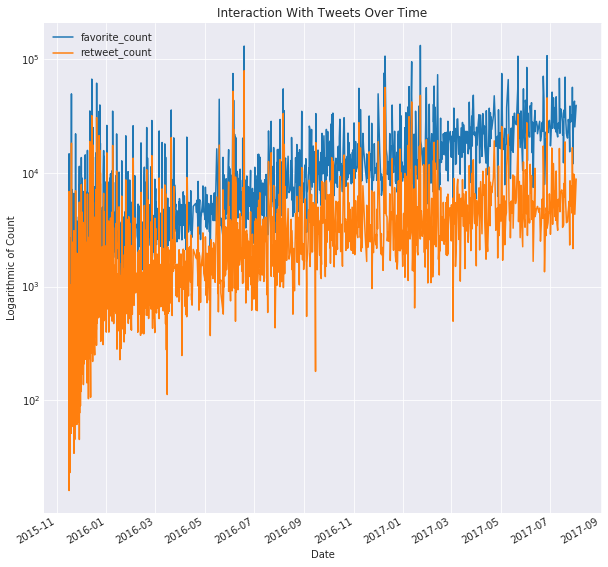

In [80]:
twitter_archive_clean.plot(x='timestamp', y=['favorite_count', 'retweet_count'], figsize=(10,10), logy=True)
plt.title('Interaction With Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Logarithmic of Count')

#### How does the dog types representation differ in tweets. What are the most featured types?

Text(0,0.5,'Count')

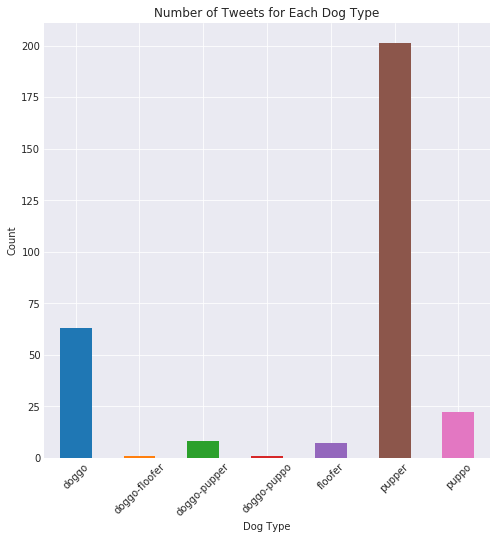

In [81]:
dog_type_count = twitter_archive_clean.groupby('dog_type')['tweet_id'].count()
dog_type_count.plot(kind='bar', figsize=(8,8), rot=45)
plt.title('Number of Tweets for Each Dog Type')
plt.xlabel('Dog Type')
plt.ylabel('Count')